In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

file_name='/Users/cami/Library/CloudStorage/OneDrive-Raccoltecondivise-eNextGen(2)/Nicolò Golinucci - Tesi Camilla/Model/MarioU/Discount_calculations.xlsx'
df = pd.read_excel(file_name, sheet_name='co-variate')
df.set_index('Unnamed: 0', inplace=True)
Y = df.loc['price']
X=df.T
X = X.drop(columns=['price'])
X['const']=1

/opt/anaconda3/envs/clustering_tesi/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  res = hypotest_fun_out(*samples, **kwds)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     5.363
Date:                Sun, 20 Oct 2024   Prob (F-statistic):             0.0427
Time:                        23:36:30   Log-Likelihood:                -57.960
No. Observations:                  12   AIC:                             129.9
Df Residuals:                       5   BIC:                             133.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PV          -145.0899     43.556     -3.331      0.0

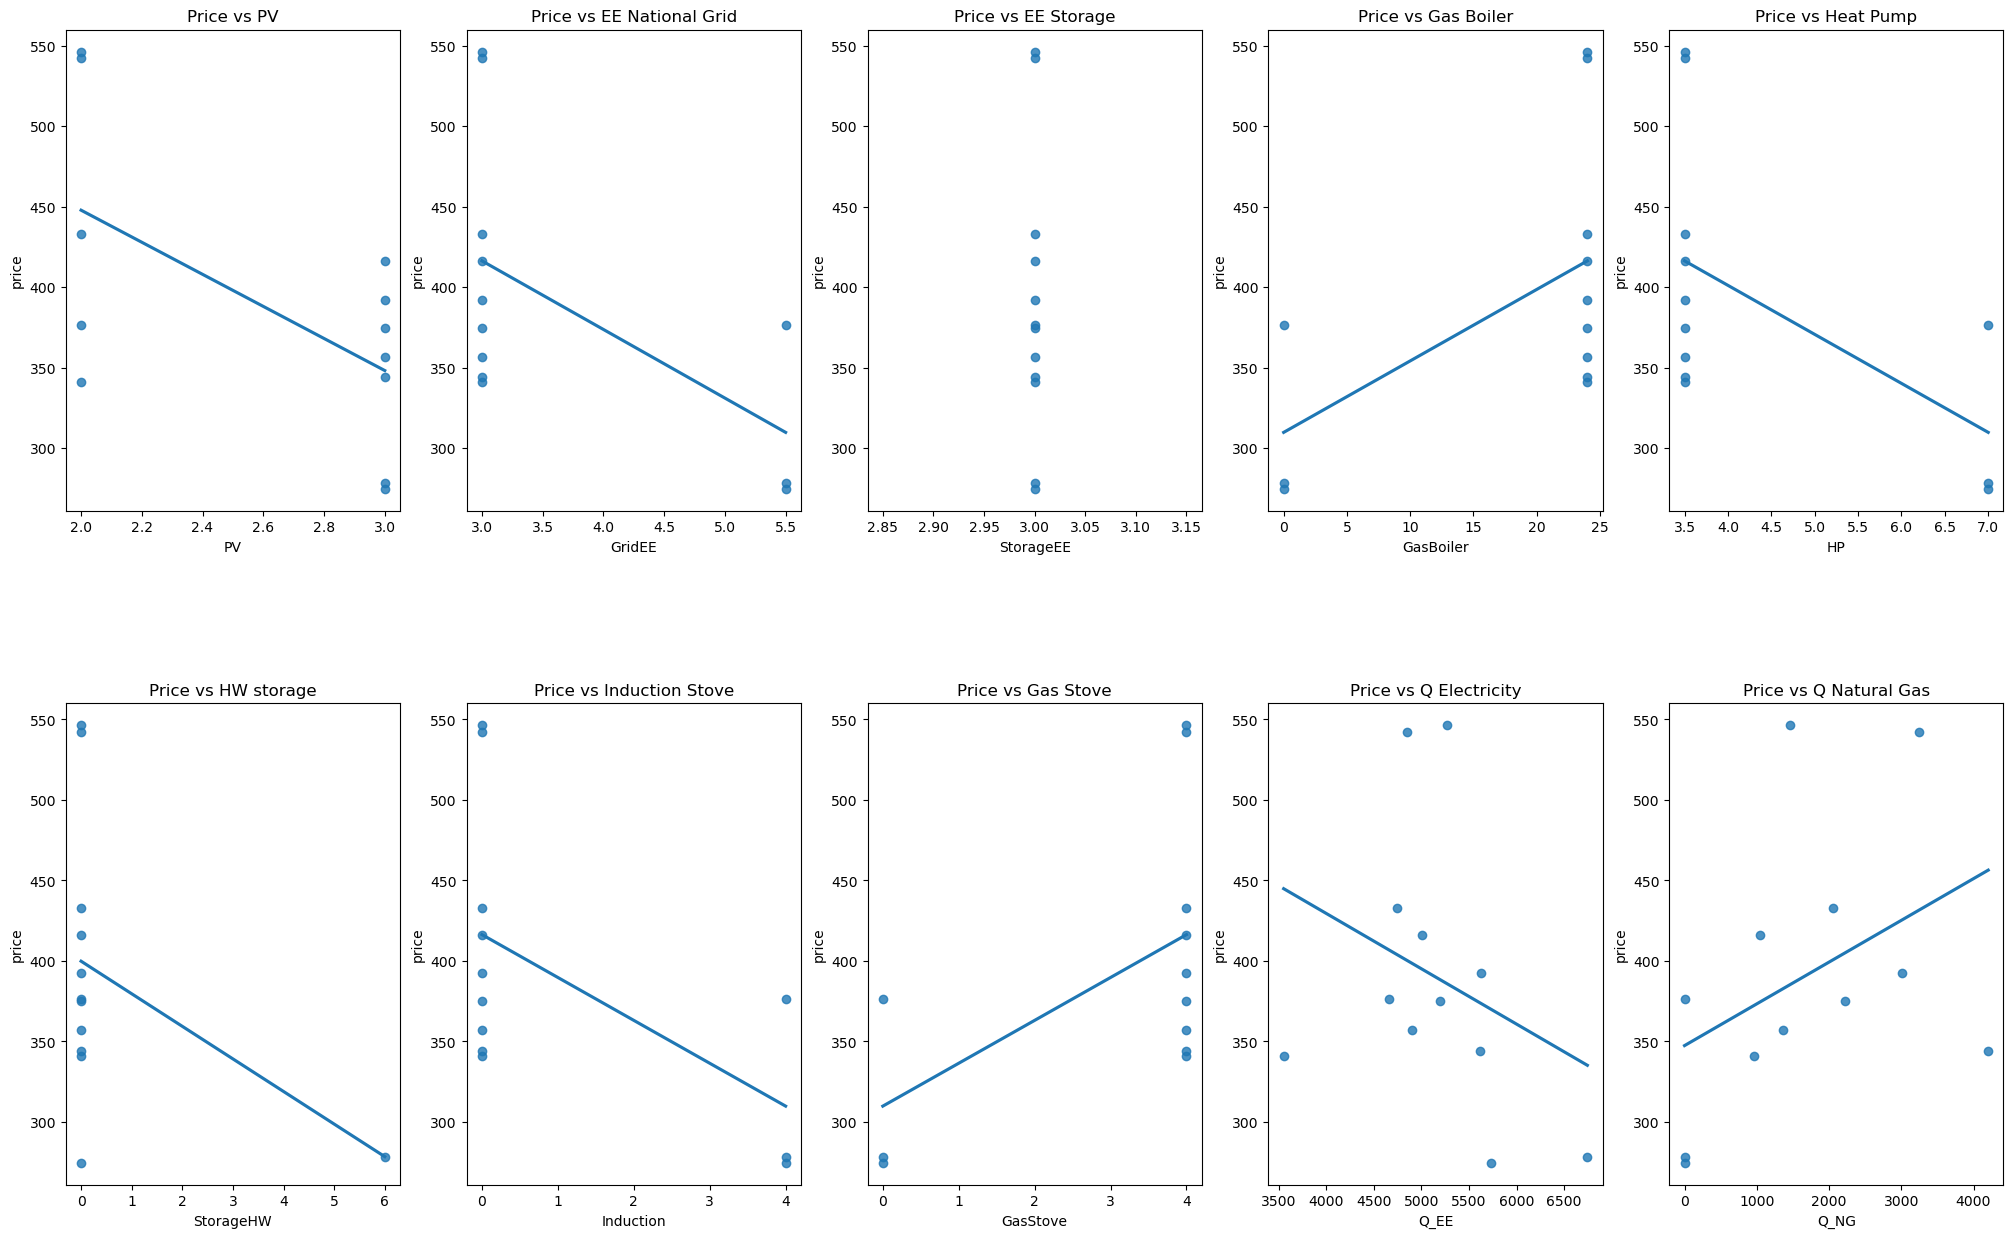

In [6]:
#Regression 
# Add constant to independent variables for regression intercept
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(Y, X).fit()

# Print regression summary
print(model.summary())

# Crea una griglia di sottotrame (4x3)
fig, axes = plt.subplots(2, 5, figsize=(25, 15))

# Aggiungi un po' di spazio tra i grafici
plt.subplots_adjust(hspace=0.4)

Xc = X.drop(columns=['const'])
Xc=Xc.drop(columns=['Radiators'])
variables=['PV','EE National Grid','EE Storage','Gas Boiler','Heat Pump', 'HW storage','Induction Stove','Gas Stove','Q Electricity','Q Natural Gas']
# Ciclo su tutte le variabili e creazione del regplot in ciascuna sottotrama
for i,v in enumerate(Xc.columns):
    row = i // 5  # riga della griglia
    col = i % 5  # colonna della griglia
    sns.regplot(x=v, y='price', data=df.T, ax=axes[row, col],ci=False)
    axes[row, col].set_title(f'Price vs {variables[i]}')

# Mostra la griglia di grafici
plt.show()

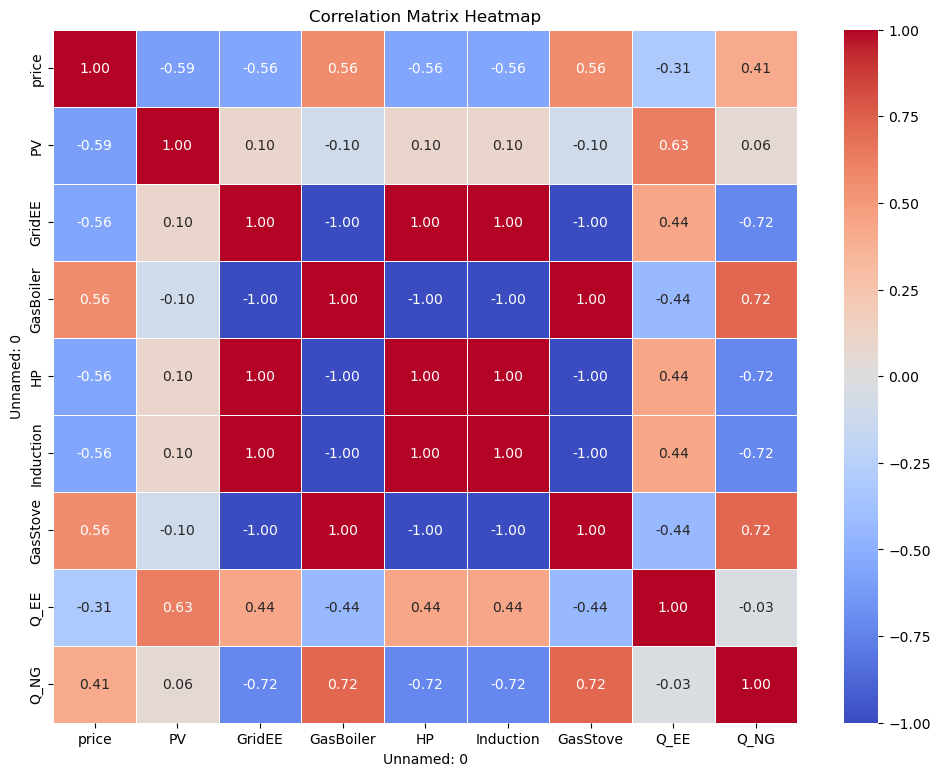

In [11]:
#Correlation heat map
df_no_stor=df.T.drop(columns=['StorageEE','StorageHW','Radiators'])
correlation_matrix = df_no_stor.corr()

# Visualizzazione della heatmap della matrice di correlazione
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [33]:
# Calcolo della matrice di correlazione
correlation_matrix = df_transposed.corr()

# Visualizzazione della heatmap della matrice di correlazione
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     12.35
Date:                Sat, 19 Oct 2024   Prob (F-statistic):             0.0143
Time:                        14:30:11   Log-Likelihood:                -49.171
No. Observations:                  12   AIC:                             114.3
Df Residuals:                       4   BIC:                             118.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5957      1.363      2.638      0.0

/opt/anaconda3/envs/clustering_tesi/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  res = hypotest_fun_out(*samples, **kwds)
